# 第九章 绘图和可视化

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)

In [2]:
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))

In [3]:
np.set_printoptions(precision=4, suppress=True)

# 9.1 matplotlib API入门

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

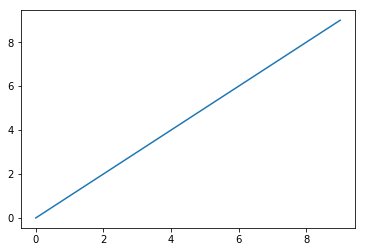

In [6]:
plt.plot(data)

### Figures and Subplots

In [15]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [16]:
ax1 = fig.add_subplot(2, 2, 1)

In [17]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

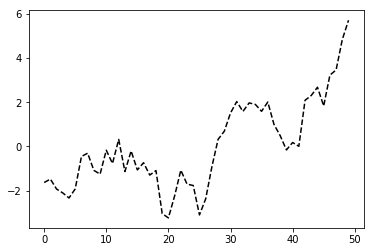

In [18]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [19]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [20]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CFC81F60B8>,
      dtype=object)

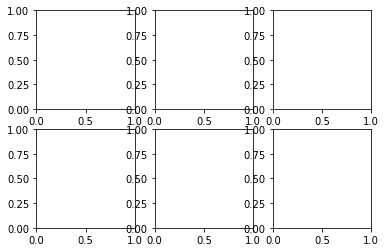

In [21]:
fig, axes = plt.subplots(2, 3)
axes

# 调整subplot周围的间距

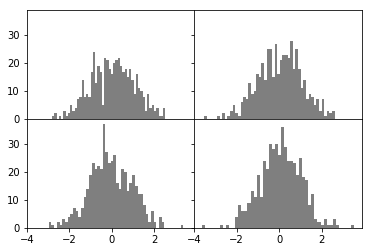

In [22]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

# 颜色、标记和线型

In [23]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

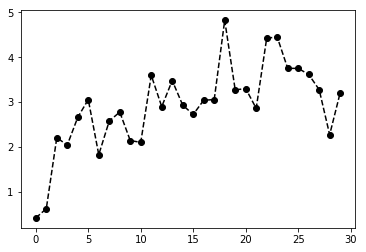

In [24]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

In [25]:
plt.close('all')

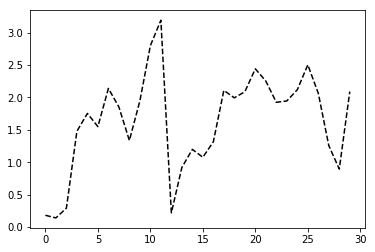

In [26]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

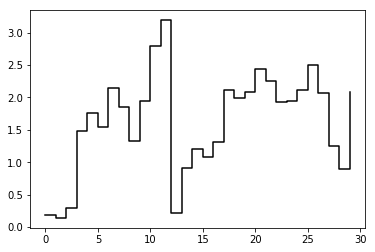

In [27]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

No handles with labels found to put in legend.


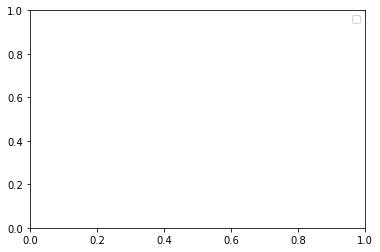

In [28]:
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

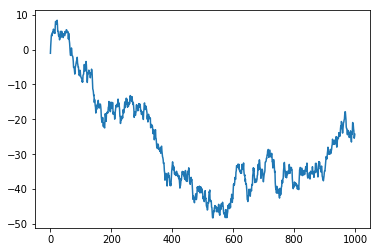

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [30]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [31]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

#### Adding legends

In [ ]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [ ]:
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

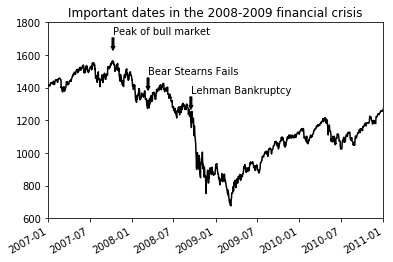

In [32]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [33]:
ax.set_title('Important dates in the 2008–2009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008–2009 financial crisis')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

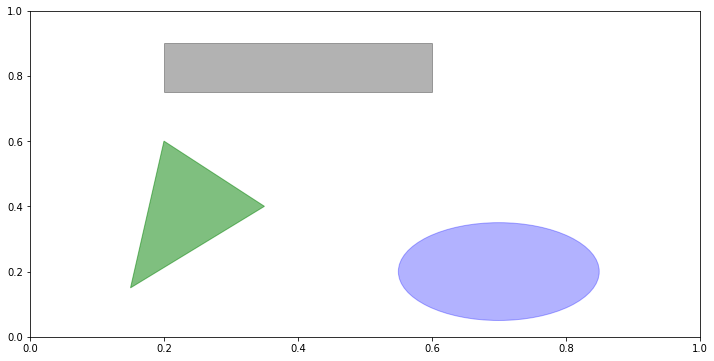

In [34]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

plt.savefig('figpath.svg')

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib Configuration

plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

## Plotting with pandas and seaborn

### Line Plots

In [35]:
plt.close('all')

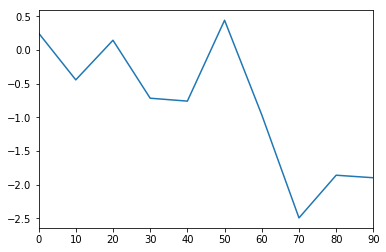

In [36]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

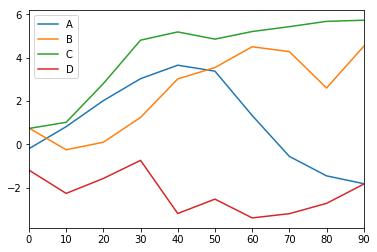

In [37]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

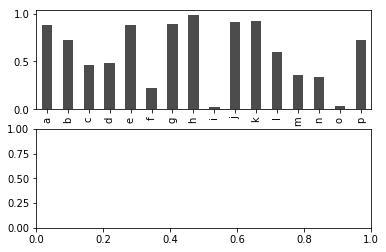

In [39]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [40]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [41]:
np.random.seed(12348)

In [43]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.355275,0.513329,0.306168,0.945081
two,0.932493,0.520682,0.402644,0.587002
three,0.333642,0.879628,0.852004,0.620666
four,0.464247,0.846397,0.442342,0.189303
five,0.643572,0.600775,0.427939,0.939054
six,0.505451,0.462759,0.839412,0.350779


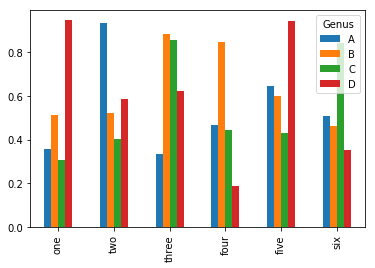

In [44]:
df.plot.bar()

In [45]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

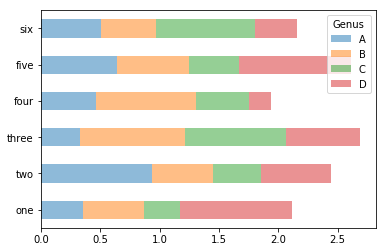

In [46]:
df.plot.barh(stacked=True, alpha=0.5)

In [47]:
plt.close('all')

In [48]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

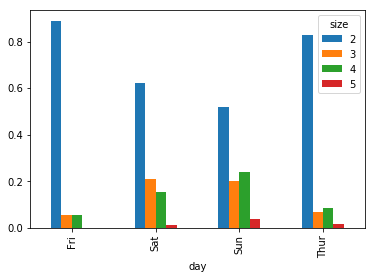

In [49]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

In [50]:
plt.close('all')

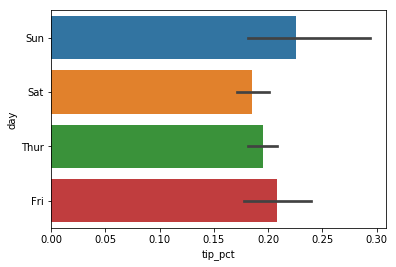

In [51]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [52]:
plt.close('all')

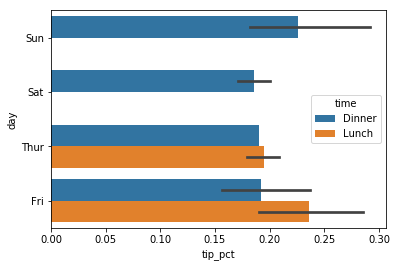

In [53]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [54]:
plt.close('all')

In [55]:
sns.set(style="whitegrid")

# 直方图和密度图

In [56]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

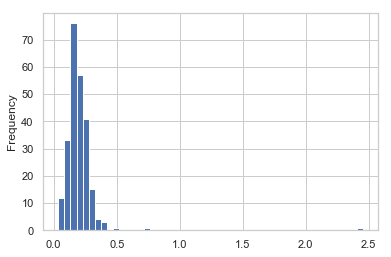

In [57]:
tips['tip_pct'].plot.hist(bins=50)

In [58]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

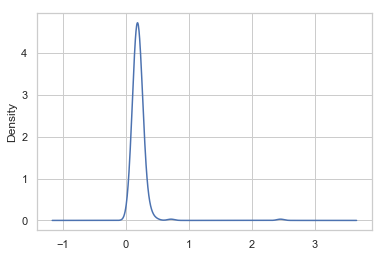

In [59]:
tips['tip_pct'].plot.density()

In [60]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

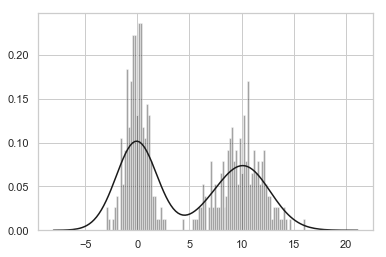

In [61]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

# 散布图或点图

In [62]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [63]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

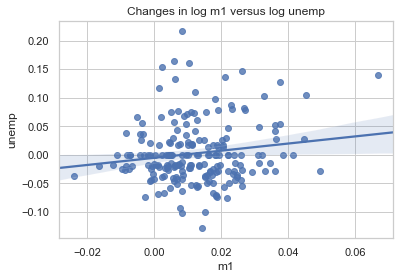

In [64]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

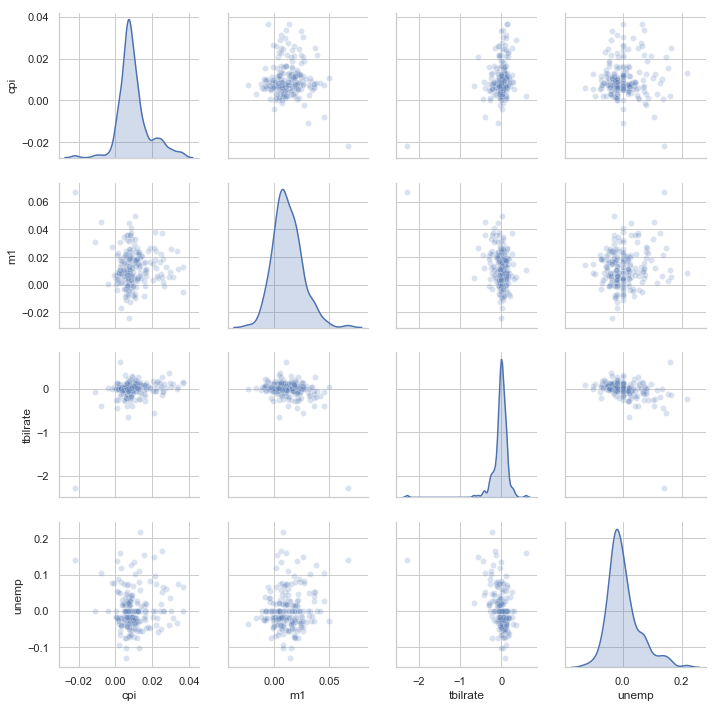

In [65]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

# 面网格和分类数据

C:\develop\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


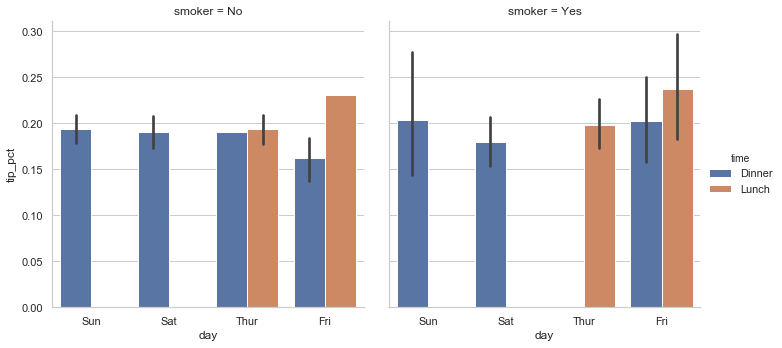

In [66]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\develop\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


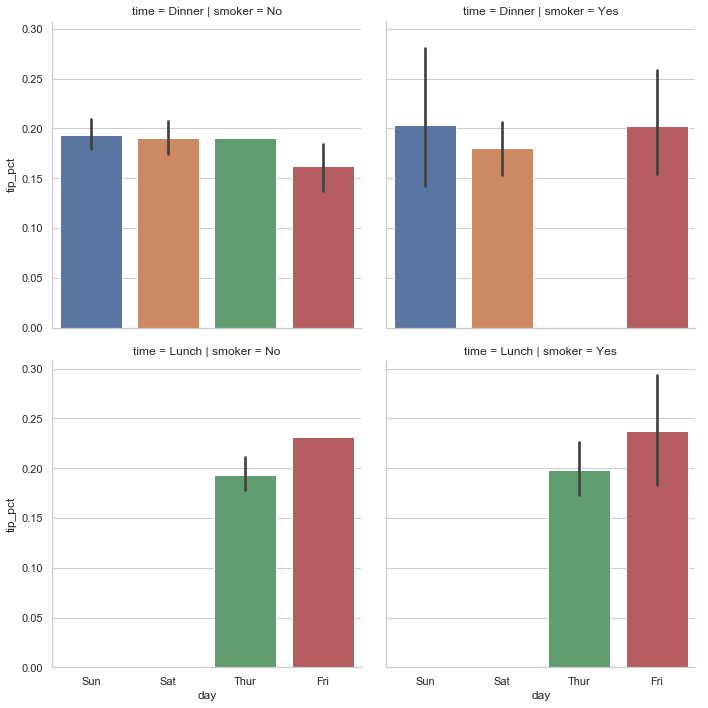

In [67]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

C:\develop\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


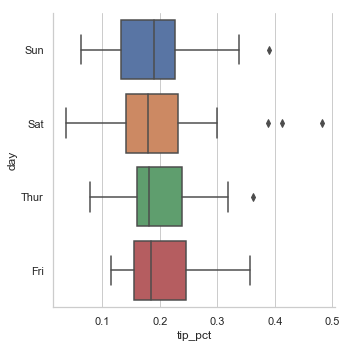

In [68]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

# 9.3 其它的Python可视化工具